In [1]:
import torch
import torch_geometric as tg
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import pickle
import os.path as osp
import networkx as nx
from sklearn.preprocessing import RobustScaler
path='../../../../tigress/mcranmer/merger_trees/isotrees/'

In [2]:
pd1=pd.read_table(path+'isotree_0_0_0.dat', skiprows=0, delimiter='\s+') # consider enforcing dtypes upon import
raw=pd1.drop(axis=0, index=np.arange(50)).reset_index()

/home/cj1223/.conda/envs/juptorch/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
trees=raw[raw.isna()['A[z]']] 
halos=raw[~raw.isna()['A[z]']] 

In [5]:
f,i="float64", "int64"
cs=[f,i,f,i,i,i,i,i,i,f,f,f,f,f,i,f,f,f,f,f,f,f,f,f,f]
print(len(cs))
dicts = {}
keys = halos.columns[1:26]
castto = cs
for i, key in enumerate(keys):
        dicts[key] = castto[i]
print(dicts)

halos=halos.astype(dicts)

25
{'#scale(0)': 'float64', 'id(1)': 'int64', 'desc_scale(2)': 'float64', 'desc_id(3)': 'int64', 'num_prog(4)': 'int64', 'pid(5)': 'int64', 'upid(6)': 'int64', 'desc_pid(7)': 'int64', 'phantom(8)': 'int64', 'sam_Mvir(9)': 'float64', 'Mvir(10)': 'float64', 'Rvir(11)': 'float64', 'rs(12)': 'float64', 'vrms(13)': 'float64', 'mmp?(14)': 'int64', 'scale_of_last_MM(15)': 'float64', 'vmax(16)': 'float64', 'x(17)': 'float64', 'y(18)': 'float64', 'z(19)': 'float64', 'vx(20)': 'float64', 'vy(21)': 'float64', 'vz(22)': 'float64', 'Jx(23)': 'float64', 'Jy(24)': 'float64'}


In [6]:
halos.dtypes.apply(lambda x: x.name).to_dict()

{'index': 'int64',
 '#scale(0)': 'float64',
 'id(1)': 'int64',
 'desc_scale(2)': 'float64',
 'desc_id(3)': 'int64',
 'num_prog(4)': 'int64',
 'pid(5)': 'int64',
 'upid(6)': 'int64',
 'desc_pid(7)': 'int64',
 'phantom(8)': 'int64',
 'sam_Mvir(9)': 'float64',
 'Mvir(10)': 'float64',
 'Rvir(11)': 'float64',
 'rs(12)': 'float64',
 'vrms(13)': 'float64',
 'mmp?(14)': 'int64',
 'scale_of_last_MM(15)': 'float64',
 'vmax(16)': 'float64',
 'x(17)': 'float64',
 'y(18)': 'float64',
 'z(19)': 'float64',
 'vx(20)': 'float64',
 'vy(21)': 'float64',
 'vz(22)': 'float64',
 'Jx(23)': 'float64',
 'Jy(24)': 'float64',
 'Jz(25)': 'float64',
 'Spin(26)': 'float64',
 'Breadth_first_ID(27)': 'float64',
 'Depth_first_ID(28)': 'float64',
 'Tree_root_ID(29)': 'float64',
 'Orig_halo_ID(30)': 'float64',
 'Snap_idx(31)': 'float64',
 'Next_coprogenitor_depthfirst_ID(32)': 'float64',
 'Last_progenitor_depthfirst_ID(33)': 'float64',
 'Last_mainleaf_depthfirst_ID(34)': 'float64',
 'Tidal_Force(35)': 'float64',
 'Tidal

In [10]:
is_cat=[1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
is_cat=[bool(i) for i in is_cat]
halos.columns[is_cat]

Index(['index', 'id(1)', 'desc_id(3)', 'num_prog(4)', 'pid(5)', 'upid(6)',
       'desc_pid(7)', 'phantom(8)', 'mmp?(14)', 'Breadth_first_ID(27)',
       'Depth_first_ID(28)', 'Tree_root_ID(29)', 'Orig_halo_ID(30)',
       'Snap_idx(31)', 'Next_coprogenitor_depthfirst_ID(32)',
       'Last_progenitor_depthfirst_ID(33)', 'Last_mainleaf_depthfirst_ID(34)',
       'Tidal_ID(36)'],
      dtype='object')

In [8]:
halos[np.logical_or(halos['desc_id(3)'] == -1,halos['num_prog(4)']!=1)]

,index,#scale(0),id(1),desc_scale(2),desc_id(3),num_prog(4),pid(5),upid(6),desc_pid(7),phantom(8),...,A[z],b_to_a(500c),c_to_a(500c),A[x](500c),A[y](500c),A[z](500c),T/|U|,M_pe_Behroozi,M_pe_Diemer,Halfmass_Radius
1,51,1.00000,1122969403,0.00000,-1,1,-1,-1,-1,0,...,-0.59764,0.73477,0.30184,1.11307,-1.04583,-0.49679,0.6532,187100000.0,42000000.0,2.103
77,127,0.22267,224373864,0.23348,239928539,0,-1,-1,-1,0,...,-0.00127,0.32347,0.10709,-1.23475,3.00947,0.56882,0.4277,77130000.0,66000000.0,5.831
79,129,1.00000,1122969405,0.00000,-1,1,-1,-1,-1,0,...,1.10749,0.51338,0.29335,0.13340,-1.03493,1.12428,0.7950,461200000.0,96000000.0,1.775
157,207,0.19968,193544526,0.21237,208880422,0,-1,-1,-1,0,...,2.27255,0.00000,0.00000,0.00000,0.00000,0.00000,1.1908,87750000.0,42000000.0,6.245
159,209,1.00000,1122969406,0.00000,-1,1,-1,-1,-1,0,...,1.23813,0.53427,0.27390,0.27341,-1.07682,1.28791,0.7505,522500000.0,132000000.0,3.081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4884306,4884356,0.17654,149198635,0.18423,163898522,0,-1,-1,-1,0,...,-0.31706,0.00000,0.00000,0.00000,0.00000,0.00000,0.8992,60570000.0,78000000.0,6.684
4884308,4884358,1.00000,1123353042,0.00000,-1,1,-1,-1,-1,0,...,5.01811,0.00000,0.00000,0.00000,0.00000,0.00000,0.6915,55270000.0,36000000.0,5.294
4884311,4884361,0.96738,1094241437,0.97659,1103958763,0,-1,-1,-1,0,...,2.06892,0.00000,0.00000,0.00000,0.00000,0.00000,0.8065,79540000.0,36000000.0,6.211
4884313,4884363,1.00000,1123353044,0.00000,-1,1,-1,-1,-1,0,...,-0.94453,0.70965,0.17492,-1.43828,0.50951,1.58835,0.5536,198900000.0,24000000.0,3.573


In [9]:
spli=np.split(np.array(halos)[:,1:50], np.array(trees.iloc[1:].index)-np.arange(1,len(trees.index)))
splits=[]
for s in tqdm(spli):
    if np.log10(s[0,10])>10:
        splits.append(s)
splits=np.array(splits, dtype=object)

100%|█████████████████████████████████████████████████████| 48505/48505 [00:00<00:00, 440576.82it/s]


In [10]:
split=[]
for tree in tqdm(splits):
    s=tree[np.logical_or(tree[:,3] == -1,tree[:,4]!=1)]
    split.append(s)
split=np.array(split, dtype=object)

100%|██████████████████████████████████████████████████████████| 770/770 [00:00<00:00, 10857.34it/s]


## SAM outputs
### First one with galprop 

In [11]:
samp='~/../../../tigress/mcranmer/merger_trees/samout/'
ex='0_0_0/'
ex+='galprop_0-99.dat'
pdc=pd.read_table(samp+ex, skiprows=0, delimiter=',', nrows=41, header=None)
newcols=pdc.iloc[:,0]
pds=pd.read_table(samp+ex, skiprows=41, delimiter='\s+', header=None)
pds.columns=np.array(newcols)

In [12]:
pd0=pds[pds[pds.columns[3]]==0.00] # subhaloes
pdcen=pd0[(pd0[pds.columns[1]]==pd0[pds.columns[2]])] ##central haloes

In [13]:
rhalid=np.array(pdcen[pds.columns[2]])
halwgal=[]
ids=[]
out=[]
for i, tree in enumerate(split):
    if tree[0,1] in rhalid:
#         halwgal.append(np.hstack([tree[:,[0,2]],tree[:,9:]]))
        halwgal.append(tree)
        ids.append(i)
        index=np.where(rhalid==tree[0,1])
        out.append(np.array(pdcen.iloc[index])[0][8])

In [14]:
hraw=np.array(splits[ids], dtype=object) ###onl

In [15]:
def convert(d,p):
    dfin=[]
    if len(p)!=len(np.unique(p)):
        print('Wrong order of prog/desc')
    else:
        no=d[0]
        for desc in d:
            if desc==no:
                dfin.append(0)
            else:
                dfin.append(p.index(desc)+1)
    return dfin, np.arange(1, 1+len(p))

In [16]:
hals=[]
# hals1=[]
pr,de=[],[]
for i in tqdm(range(len(halwgal))):
    h=halwgal[i]
    roots=h[h[:,4]==0]
#     mergers=h[np.logical_and(h[:,4]>1,h[:,3]!=-1)] #remove self-loop, is broken since some roots go directly to final
    mergers=h[h[:,4]>1]
    final=h[h[:,3]==-1]
    pro, des=[],[]
    for r in roots: #tqdm(roots, total=len(roots))
        descid=hraw[i][:,3][np.where(r[1]==hraw[i][:,1])]
        while descid not in mergers[:,1]:
            descid=hraw[i][:,3][np.where(descid==hraw[i][:,1])] #consider adding the number of steps it went through
        pro.append(r[1])
        des.append(descid[0])
    m=mergers[mergers[:, 0].argsort()] #sort by redshift, starting at early times
    mdes,mpro=list(m[:,1][1:]), list(m[:,1])
    des+=mdes
    pro+=mpro
    des.append(final[:,1][0])
    des,pro=convert(des[::-1],pro[::-1])
    hal2=np.vstack([final,np.flip(m,axis=0).copy(),np.flip(roots,axis=0).copy()])
    ###mask the columns, consider adding in the extra columns after 35
    hal2=hal2[:,[0,2,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,35]] 
    ##apply transformation here, remove columns not desired
    ## consider RobustScaler or Quantile_Transformer, need to be fitted on the full dataset first
    hals.append(hal2)
    pr.append([int(p) for p in pro])
    de.append([int(d) for d in des])
hals=np.array(hals,dtype=object)

100%|█████████████████████████████████████████████████████████████| 769/769 [00:40<00:00, 19.17it/s]


In [17]:
dat=[]
for n in tqdm(range(len(out))):
    edge_index = torch.tensor([pr[n],de[n]], dtype=torch.long)
    x = torch.tensor(hals[n], dtype=torch.float)

    y=torch.tensor(out[n], dtype=torch.float)
    graph=Data(x=x, edge_index=edge_index, y=y)
    dat.append(graph)

100%|███████████████████████████████████████████████████████████| 769/769 [00:00<00:00, 1874.33it/s]


Made graph
drawing


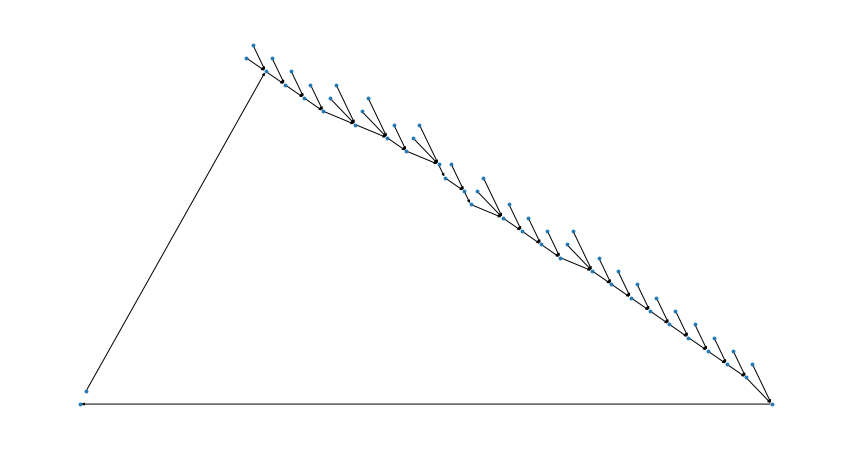

In [19]:
j=0
from matplotlib import cm
cmap=cm.get_cmap(name='magma')
fig,ax=plt.subplots(figsize=(15,8))
G=tg.utils.to_networkx(dat[j]) #, node_attrs=dat[j].x
print('Made graph')
# G.remove_nodes_from(list(nx.isolates(G)))
pos=nx.planar_layout(G)
# pos=nx.kamada_kawai_layout(G) #this one is kinda snakey but works pretty well! Slow as hell though
if G.number_of_nodes()<2000:
    print('drawing')
    nx.draw(G, pos=pos,ax=ax, node_size=8, arrowsize=5, cmap=cmap)

In [85]:
np.array(list(nx.degree_centrality(G).values()))*(G.number_of_nodes()-1)

array([1., 3., 3., 4., 2., 4., 5., 3., 3., 3., 2., 3., 3., 3., 5., 2., 5.,
       4., 3., 3., 2., 5., 4., 4., 5., 5., 3., 4., 4., 3., 4., 5., 2., 2.,
       3., 3., 4., 3., 3., 4., 3., 5., 4., 4., 3., 3., 4., 3., 4., 3., 5.,
       3., 3., 4., 3., 3., 3., 4., 2., 3., 4., 4., 4., 4., 4., 4., 3., 4.,
       4., 4., 3., 3., 4., 5., 4., 3., 3., 3., 3., 4., 5., 3., 3., 4., 3.,
       3., 3., 4., 4., 4., 4., 3., 4., 4., 3., 3., 4., 4., 3., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [38]:
# So 0 is the beginning haloes that do not have any progenitor (starting IDs)
np.sum(halwgal[0][:,4]!=1)-np.sum(halwgal[0][:,4]>1), np.sum(halwgal[0][:,4]==0), len(np.unique(halwgal[0][:,34]))

(30, 30, 30)

In [43]:
#     depth_first_id masked by being first   ==       unique    lastmainleaf_depth_id
np.sort(halwgal[0][:,28][halwgal[0][:,4]==0])==np.sort(np.unique(halwgal[0][:,34])) ## so these are the same

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [70]:
halwgal[0][:,28][halwgal[0][:,4]==0]

array([2.63207726e+08, 2.63207731e+08, 2.63207748e+08, 2.63207739e+08,
       2.63207756e+08, 2.63207762e+08, 2.63207766e+08, 2.63207772e+08,
       2.63207779e+08, 2.63207795e+08, 2.63207803e+08, 2.63207817e+08,
       2.63207903e+08, 2.63207910e+08, 2.63207851e+08, 2.63207838e+08,
       2.63207871e+08, 2.63207937e+08, 2.63208021e+08, 2.63207984e+08,
       2.63207959e+08, 2.63208025e+08, 2.46902737e+08, 2.63208067e+08,
       2.63208071e+08, 2.63208092e+08, 2.63208099e+08, 6.55192520e+07,
       2.63208158e+08, 8.86031305e+08])

In [72]:
hal[0][:,28]

array([2.63207631e+08, 2.63207632e+08, 2.63207637e+08, 2.63207658e+08,
       2.63207663e+08, 2.63207670e+08, 2.63207671e+08, 2.63207673e+08,
       2.63207674e+08, 2.63207675e+08, 2.63207685e+08, 2.63207686e+08,
       2.63207698e+08, 2.63207699e+08, 2.63207700e+08, 2.63207706e+08,
       2.63207707e+08, 2.63207708e+08, 2.63207711e+08, 2.63207717e+08,
       2.63207718e+08, 2.63207720e+08, 2.63207722e+08, 2.63207726e+08,
       2.63207729e+08, 2.63207731e+08, 2.63207748e+08, 2.63207739e+08,
       2.63207756e+08, 2.63207762e+08, 2.63207766e+08, 2.63207772e+08,
       2.63207779e+08, 2.63207781e+08, 2.63207795e+08, 2.63207803e+08,
       2.63207817e+08, 2.63207890e+08, 2.63207903e+08, 2.63207910e+08,
       2.63207851e+08, 2.63207838e+08, 2.63207871e+08, 2.63207937e+08,
       2.63208021e+08, 2.63207984e+08, 2.63207959e+08, 2.63208025e+08,
       2.46902737e+08, 2.63208067e+08, 2.63208071e+08, 2.63208092e+08,
       2.63208099e+08, 6.55192520e+07, 2.63208158e+08, 8.86031305e+08])

In [ ]:
# so the idea would be to connect all the num_prog(4)==0's to all num_prog>1 if desc_id(3)!=-1

In [63]:
def convert(d,p):
    dfin=[]
    if len(p)!=len(np.unique(p)):
        print('Wrong order of prog/desc')
    else:
        no=d[0]
        for desc in d:
            if desc==no:
                dfin.append(0)
            else:
                dfin.append(p.index(desc)+1)
    return dfin, np.arange(1, 1+len(p))

deid, prid=[], [] ## making to and from list, list of descendants from list of progenitors in pytorch required style
de, pr = [], []
for k in tqdm(range(len(hal))):
    des, pro=[], []
    for i, desc in enumerate(hal[k][:,3]):
        if desc in hal[k][:i,1]:
            des.append(int(desc))
            pro.append(int(hal[k][i,1]))
    deid.append(des)
    prid.append(pro)
    desg, prog = convert(des,pro) #it needs to map halo 0,1,2,3 so on, not the true halo id
    de.append(desg)
    pr.append(prog)

  0%|                                                                       | 0/769 [00:00<?, ?it/s]


ValueError: 719904704 is not in list

In [19]:
len(halwgal[8])

199472

In [20]:
from torch_geometric.data import Data
import networkx as nx
import torch_geometric
import time
dat=[]
ts=[]
ls=[]
err=[]
long=[]
ln=[]
a=0
for n in tqdm(range(len(out)//10)):
    l=len(halwgal[n])
    if l<10000:
        start=time.time()
        edge_index = torch.tensor([pr[n],de[n]], dtype=torch.long)
        x = torch.tensor(halwgal[n], dtype=torch.float)

        y=torch.tensor(out[n], dtype=torch.float)
        graph=Data(x=x, edge_index=edge_index, y=y, dtype=torch.float)
        mask=np.array(tg.utils.to_scipy_sparse_matrix(graph.edge_index).sum(axis=0))[0]!=1
        prm=pr[n][~mask[1:]]
        dem=np.array(de[n])[~mask[1:]]
        G=tg.utils.to_networkx(graph)
        for i in range(len(prm)):
            try:
                G=nx.contracted_edge(G,(prm[i],dem[i]), self_loops=0)
            except:
                continue
        gl=list(G.nodes)
        x1=halwgal[n][gl]
        progs, descs=[],[]
        for p, d in list(G.edges): 
            progs.append(p)
            descs.append(d)
        try:
            d2,p2=convert(descs,progs)
            edge_index = torch.tensor([p2,d2], dtype=torch.long)
            x2 = torch.tensor(x1, dtype=torch.float)
            dat.append(Data(x=x2, edge_index=edge_index, y=y, dtype=torch.float))
        except:
            print(n)
            a+=1
            err.append(n)
        stop=time.time()
        ts.append(stop-start)
        ls.append(l)
    else:
        print(n)
        a+=1
        long.append(l)
        ln.append(n)

  3%|█▋                                                              | 2/76 [00:15<10:44,  8.71s/it]

1


 11%|██████▋                                                         | 8/76 [01:08<10:14,  9.04s/it]

8


 17%|██████████▊                                                    | 13/76 [01:14<03:28,  3.32s/it]

13


 20%|████████████▍                                                  | 15/76 [02:12<13:47, 13.57s/it]

16


 24%|██████████████▉                                                | 18/76 [02:13<07:10,  7.42s/it]

17


 32%|███████████████████▉                                           | 24/76 [02:19<01:55,  2.22s/it]

24


 36%|██████████████████████▍                                        | 27/76 [03:55<19:03, 23.35s/it]

26


 41%|█████████████████████████▋                                     | 31/76 [04:40<10:19, 13.78s/it]

28
29


 46%|█████████████████████████████                                  | 35/76 [04:59<04:11,  6.12s/it]

35


 49%|██████████████████████████████▋                                | 37/76 [06:12<12:40, 19.50s/it]

37
38


 55%|██████████████████████████████████▊                            | 42/76 [06:17<04:00,  7.08s/it]

42


 61%|██████████████████████████████████████▏                        | 46/76 [07:13<05:51, 11.71s/it]

44
46
47


 72%|█████████████████████████████████████████████▌                 | 55/76 [07:45<01:28,  4.19s/it]

51
52
53


 75%|███████████████████████████████████████████████▎               | 57/76 [10:59<09:04, 28.66s/it]

55


 78%|████████████████████████████████████████████████▉              | 59/76 [11:51<07:20, 25.94s/it]

59


 80%|██████████████████████████████████████████████████▌            | 61/76 [11:52<03:55, 15.68s/it]

60


 82%|███████████████████████████████████████████████████▍           | 62/76 [14:44<11:45, 50.37s/it]

61


 88%|██████████████████████████████████████████████████████▋       | 67/76 [26:12<16:50, 112.32s/it]

66


 89%|████████████████████████████████████████████████████████▎      | 68/76 [26:46<11:58, 89.83s/it]

67


 91%|█████████████████████████████████████████████████████████▏     | 69/76 [27:43<09:22, 80.31s/it]

68


 97%|█████████████████████████████████████████████████████████████▎ | 74/76 [31:36<01:41, 50.98s/it]

73


100%|███████████████████████████████████████████████████████████████| 76/76 [32:45<00:00, 25.87s/it]

75


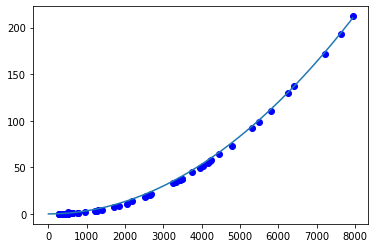

In [21]:
plt.plot(ls,ts, 'bo')
x=np.arange(max(ls))
plt.plot(x,np.array(x)**2/3e5)

In [27]:
np.array(2e5)**2/3e5/3600

37.03703703703704

In [29]:
dat2=[]
for n in tqdm(range(len(out))):
    l=len(halwgal[n])
    start=time.time()
    edge_index = torch.tensor([pr[n],de[n]], dtype=torch.long)
    x = torch.tensor(halwgal[n], dtype=torch.float)

    y=torch.tensor(out[n], dtype=torch.float)
    graph=Data(x=x, edge_index=edge_index, y=y, dtype=torch.float)
    dat2.append(graph)
#     mask=np.array(tg.utils.to_scipy_sparse_matrix(graph.edge_index).sum(axis=0))[0]!=1
#     prm=pr[n][~mask[1:]]
#     dem=np.array(de[n])[~mask[1:]]
#     G=tg.utils.to_networkx(graph)
#     for i in range(len(prm)):
#         try:
#             G=nx.contracted_edge(G,(prm[i],dem[i]), self_loops=0)
#         except:
#             continue
#     gl=list(G.nodes)
#     x1=halwgal[n][gl]
#     progs, descs=[],[]
#     for p, d in list(G.edges): 
#         progs.append(p)
#         descs.append(d)
#     try:
#         d2,p2=convert(descs,progs)
#         edge_index = torch.tensor([p2,d2], dtype=torch.long)
#         x2 = torch.tensor(x1, dtype=torch.float)
#         dat.append(Data(x=x2, edge_index=edge_index, y=y, dtype=torch.float))
#     except:
#         print(n)
#         a+=1
#         err.append(n)
#     stop=time.time()
#     ts.append(stop-start)
#     ls.append(l)

100%|███████████████████████████████████████████████████████████| 769/769 [00:00<00:00, 1472.77it/s]


In [36]:
n=1
graph=dat2[n]
mask=np.array(tg.utils.to_scipy_sparse_matrix(graph.edge_index).sum(axis=0))[0]!=1
prm=pr[n][~mask[1:]]
dem=np.array(de[n])[~mask[1:]]
G=tg.utils.to_networkx(graph)
edges=[]
for i in range(len(prm)):
        edges.append((prm[i],dem[i]))
G=nx.contracted_nodes(G,edges[0], self_loops=0)            


TypeError: contracted_nodes() missing 1 required positional argument: 'v'

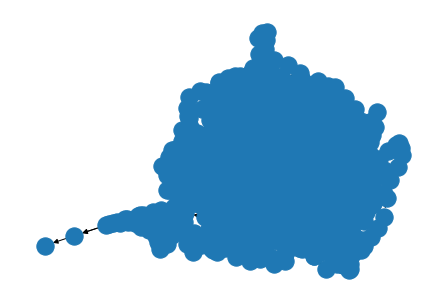

In [37]:
n=1
graph=dat2[n]
G=tg.utils.to_networkx(graph)
g=nx.condensation(G)
nx.draw(g)

In [40]:
g.number_of_nodes(), G.number_of_nodes()

(2193, 2193)

In [ ]:
savepath=path='../../../../tigress/cj1223/graph_merge/'
pickle.dump(dat, open(osp.join(savepath, f"data_0.dat"), 'wb'))
pickle.dump(dat, f"data_0.dat", 'wb'))

In [ ]:
data=pickle.load(open(osp.join(savepath, f"data_0.dat"), 'rb'))
data=pickle.load(open(f"data_0.dat", 'rb'))

In [ ]:
def convert(d,p):
    dfin=[]
    if len(p)!=len(np.unique(p)):
        print('Wrong order of prog/desc')
    else:
        no=d[0]
        for desc in d:
            if desc==no:
                dfin.append(0)
            else:
                dfin.append(p.index(desc)+1)
    return dfin, np.arange(1, 1+len(p))

In [ ]:
n=8
dat=dat2
mask=np.array(tg.utils.to_scipy_sparse_matrix(dat[n].edge_index).sum(axis=0))[0]!=1
prm=pr[n][~mask[1:]]
dem=np.array(de[n])[~mask[1:]]
G=tg.utils.to_networkx(dat[n])
for i in range(len(prm)):
    try:
        G=nx.contracted_edge(G,(prm[i],dem[i]), self_loops=0)
    except:
        continue
        print(i)

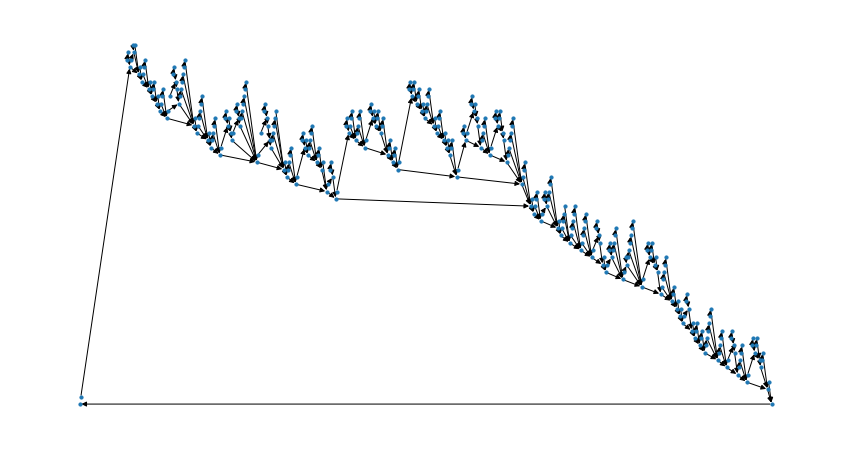

In [58]:
fig,ax=plt.subplots(figsize=(15,8))
pos=nx.planar_layout(G)
# G.remove_edges_from(nx.selfloop_edges(G))
# pos=nx.bipartite_layout(g, nodes=np.arange(0,100))
nx.draw(G, pos=pos, ax=ax, node_size=10)

In [49]:
# nx.get_node_attributes(G)
# for n, d in G.nodes.items():
#     print(n,d)

In [50]:
G.number_of_nodes(), nx.is_connected(G.to_undirected())

(83, True)

In [51]:
gl=list(G.nodes)
x1=halwgal[n][gl]
progs, descs=[],[]
for p, d in list(G.edges): 
    progs.append(p)
    descs.append(d)
d2,p2=convert(descs,progs)
edge_index = torch.tensor([p2,d2], dtype=torch.long)
x2 = torch.tensor(x1, dtype=torch.float)
graph=Data(x=x2, edge_index=edge_index, y=y, dtype=torch.float)

In [ ]:
G=torch_geometric.utils.to_networkx(graph)
fig,ax=plt.subplots(figsize=(15,8))
pos=nx.planar_layout(G)
# G.remove_edges_from(nx.selfloop_edges(G))
# pos=nx.bipartite_layout(g, nodes=np.arange(0,100))
nx.draw(G, pos=pos, ax=ax, node_size=10)

In [ ]:
graph.x

In [ ]:
nx.is_connected(G.to_undirected())

In [ ]:
fig.savefig('graph.png')

In [ ]:
p, e = graph.edge_index
u,N=np.unique(e,return_counts=1)

In [ ]:
pd.Series(np.array(e)).is_unique

In [ ]:
# mask1=np.unique(de[8], return_counts=True)[1]==1
k=0
mask=np.array(tg.utils.to_scipy_sparse_matrix(dat[k].edge_index).sum(axis=0))[0]!=1
mask1=torch.tensor(mask, dtype=torch.bool)
np.shape(tg.utils.subgraph(mask1, dat[k].edge_index, relabel_nodes=1)[0]), np.sum(mask)

In [17]:
datm=[]
for n in range(len(out)):
    edge_index = torch.tensor([pr[n],de[n]], dtype=torch.long)
    x = torch.tensor(halwgal[n], dtype=torch.float)

    y=torch.tensor(out[n], dtype=torch.float)
    graph=Data(x=x, edge_index=edge_index, y=y, dtype=torch.float)
    mask=torch.tensor(np.log10(halwgal[n][:,10])>9, dtype=torch.bool)
    edge=tg.utils.subgraph(mask, graph.edge_index, relabel_nodes=1)[0]
    graph=Data(x=x[mask], edge_index=edge, y=y, dtype=torch.float)
    datm.append(graph)

In [18]:
n=-1
graph=dat[n]
mask=torch.tensor(np.log10(halwgal[n][:,10])>9, dtype=torch.bool)
edge=tg.utils.subgraph(mask, graph.edge_index, relabel_nodes=1)
len(edge[0][0]), torch.sum(mask), len(mask)

(116, tensor(117), 246)

In [19]:
date=[]
a=0
for n in range(len(out)):
    edge_index = torch.tensor([pr[n],de[n]], dtype=torch.long)
    x = torch.tensor(halwgal[n], dtype=torch.float)

    y=torch.tensor(out[n], dtype=torch.float)
    graph=Data(x=x, edge_index=edge_index, y=y, dtype=torch.float)
    mask1=np.array(tg.utils.to_scipy_sparse_matrix(graph.edge_index).sum(axis=0))[0]!=1
    mask1=torch.tensor(mask1, dtype=torch.bool)
    edge=tg.utils.subgraph(mask1, graph.edge_index, relabel_nodes=1)[0]
    graph=Data(x=x[mask1], edge_index=edge, y=y, dtype=torch.float)
    date.append(graph)

In [ ]:
import networkx as nx
import torch_geometric
a,b,c=0,0,0
for n in tqdm(range(len(dat))):
    g = torch_geometric.utils.to_networkx(dat[n], to_undirected=1)
    a+=int(nx.is_connected(g))
    g = torch_geometric.utils.to_networkx(datm[n], to_undirected=1)
    b+=int(nx.is_connected(g))
    g = torch_geometric.utils.to_networkx(date[n], to_undirected=1)
    c+=int(nx.is_connected(g))
    
# g.number_of_nodes()
a,b,c

In [ ]:
savepath=path='../../../../tigress/cj1223/graph_merge/'
pickle.dump(dat, open(osp.join(savepath, f"data_1.dat"), 'wb'))

In [ ]:
import torch, pickle, os
import torch_geometric as tg
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from torch_geometric.data import Dataset, Data
import os.path as osp

class MTrees(Dataset):
    def __init__(self, case='test',root='../../../../tigress/cj1223/graph_merge/', ndat=1, ncube=1,  transform=None, pre_transform=None, 
                 load_path='../../../../tigress/mcranmer/merger_trees/',
                ):
        
        self.ndat=ndat
        self.ncube=ncube
        self.load_path=load_path
        self.root=root
        self.case=case
        super().__init__(root, transform, pre_transform)
    
    ### Implement a method to remove and redo dataset ### 
    
    @property
    def raw_dir(self):
        return self.load_path
    
    @property
    def raw_file_names(self):
        return [osp.join(self.root,self.case,'processed','data_'+str(x)+'.dat') for x in range(self.ndat)]

    @property
    def processed_file_names(self):
        return [osp.join(self.root,self.case,'processed','data_'+str(x)+'.dat') for x in range(self.ndat)]

    def download(self):
        # Download to `self.raw_dir`.
        self.check_folder()
        loadhalo, loadgal=[], []
        for i in range(self.ncube):
            for j in range(self.ncube):
                for k in range(self.ncube):
                    loadhalo.append(self.load_path+f'isotrees/isotree_{i}_{j}_{k}.dat')
                    loadgal.append(self.load_path+f'/samout/{i}_{j}_{k}/galprop_0-99.dat')
        print('Got filenames')
        return loadhalo, loadgal
    
    def check_folder(self):
        cpath=osp.join(self.root, self.case)
        if not osp.exists(cpath):
            os.makedirs(cpath)
            print('Folder made')
        else:
            print(self.case+' case folder already exist')
        
    def process(self):
        m=0    
        halopaths, galpaths = self.download()
        for hp, gp in tqdm(zip(halopaths, galpaths), total=len(galpaths)):
            
            print(f'Importing data {hp}')
            pd1=pd.read_table(hp, skiprows=0, delimiter='\s+') # may want to just import target, can't enforce dtype
            raw=pd1.drop(axis=0, index=np.arange(50)).reset_index()
            trees=raw[raw.isna()['A[z]']] 
            halos=raw[~raw.isna()['A[z]']] 
            ##### I might be able to shorten this a bit #####
            f,i="float64", "int64"
            cs=[f,i,f,i,i,i,i,i,i,f,f,f,f,f,i,f,f,f,f,f,f,f,f,f,f,f]
            dicts = {}
            keys = halos.columns[1:26]
            castto = cs
            for i, key in enumerate(keys):
                    dicts[key] = castto[i]

            halos=halos.astype(dicts)
            
            ###### End ####
            print('Splitting data')
            spli=np.split(np.array(halos)[:,1:50], np.array(trees.iloc[1:].index)-np.arange(1,len(trees.index)))
            split=[]
            for s in tqdm(spli):
                if np.log10(s[0,10])>10:
                    split.append(s)
            split=np.array(split, dtype=object)

            #### Start making adjacency ####
            def convert(d,p):
                dfin=[]
                if len(p)!=len(np.unique(p)):
                    print('Wrong order of prog/desc')
                else:
                    no=d[0]
                    for desc in d:
                        if desc==no:
                            dfin.append(0)
                        else:
                            dfin.append(p.index(desc)+1)
                return dfin, np.arange(1, 1+len(p))
            ####
            print('Creating adjacency matrix')
            de, pr = [], []
            for k in tqdm(range(len(split))):
                des, pro=[], []
                for i, desc in enumerate(split[k][:,3]):
                    if desc in split[k][:i,1]:
                        des.append(int(desc))
                        pro.append(int(split[k][i,1]))
                desg, prog = convert(des,pro) #it needs to map halo 0,1,2,3 so on, not the true halo id
                de.append(desg)
                pr.append(prog)
            print(f'Adjacency matrix {m} completed')
            print(f'Loading targets')
            ##getting the galaxy output
            pdc=pd.read_table(gp, skiprows=0, delimiter=',', nrows=41, header=None)
            newcols=pdc.iloc[:,0]
            pds=pd.read_table(gp, skiprows=41, delimiter='\s+', header=None) # may want to just import target
            pds.columns=np.array(newcols)
            pd0=pds[pds[pds.columns[3]]==0.00] # subhaloes
            pdcen=pd0[(pd0[pds.columns[1]]==pd0[pds.columns[2]])] ##central haloes
            
            rhalid=np.array(pdcen[pds.columns[2]])
            halwgal=[]
            ids=[]
            out=[]
            print('Matching targets and data')
            for i, tree in enumerate(split):
                if tree[0,1] in rhalid:
                    halwgal.append(np.hstack([tree[:,[0,2]],tree[:,9:]])) #redo class so that data columns can be chosen upon initialization
                    ids.append(np.array(tree[0,1]))
                    index=np.where(rhalid==tree[0,1])
                    out.append(np.array(pdcen.iloc[index])[0][8]) #redo class so that target column(s) can be chosen upon initialization
            halwgal=np.array(halwgal, dtype=object)
            ids=np.array(ids)
            out=np.log10(np.array(out))
            dat=[]
            for n in range(len(out)):
                edge_index = torch.tensor([pr[n],
                                           de[n]], dtype=torch.long)
                x = torch.tensor(halwgal[n], dtype=torch.float)

                y=torch.tensor(out[n], dtype=torch.float)
                dat.append(Data(x=x, edge_index=edge_index, y=y, dtype=torch.float))
            print('Saving dataset')
            torch.save(dat, osp.join(self.root, self.case, f'data_{m}.pt'))
            m+=1
            
    def len(self):
        return len(self.processed_file_names)
    
    def get(self, i):
        print("Reading data")
        data = torch.load(dat, osp.join(self.root, self.case, f'data_{i}.pt'))
        return data

In [ ]:
data=MTrees()

In [ ]:
torch.cuda.is_available()
# device = torch.device('cuda')
# data = data.to(device)

In [ ]:
from torch_geometric.loader import DataLoader

loader = DataLoader(data, batch_size=32)

In [ ]:
for batch in loader:
    print(batch)

In [ ]:
# Define our GCN class as a pytorch Module
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        # We inherit from pytorch geometric's GCN class, and we initialize three layers
        self.conv1 = GCNConv(dataset.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        # Our final linear layer will define our output
        self.lin = Linear(hidden_channels, dataset.num_classes)
        
    def forward(self, x, edge_index, batch):
      # 1. Obtain node embeddings 
      x = self.conv1(x, edge_index)
      x = x.relu()
      x = self.conv2(x, edge_index)
      x = x.relu()
      x = self.conv3(x, edge_index)   
 
      # 2. Readout layer
      x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]
 
      # 3. Apply a final classifier
      x = F.dropout(x, p=0.5, training=self.training)
      x = self.lin(x)
      return x
    
model = GCN(hidden_channels=64)

In [13]:
# def convert(d,p):
#     dfin=[]
#     if len(p)!=len(np.unique(p)):
#         print('Wrong order of prog/desc')
#     else:
#         no=d[0]
#         for desc in d:
#             if desc==no:
#                 dfin.append(0)
#             else:
#                 dfin.append(p.index(desc)+1)
#     return dfin, np.arange(1, 1+len(p))

# deid, prid=[], [] ## making to and from list, list of descendants from list of progenitors in pytorch required style
# de, pr = [], []
# for k in tqdm(range(len(split))):
#     des, pro=[], []
#     for i, desc in enumerate(split[k][:,3]):
#         if desc in split[k][:i,1]:
#             des.append(int(desc))
#             pro.append(int(split[k][i,1]))
#     deid.append(des)
#     prid.append(pro)
#     desg, prog = convert(des,pro) #it needs to map halo 0,1,2,3 so on, not the true halo id
#     de.append(desg)
#     pr.append(prog)
    